# Import libraries

In [112]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

# load data and exploring

In [ ]:
city = pd.read_csv('E:/uni\AI quera\project\data_project1\iran_city_classification.csv')

In [181]:
city.head()

,نام شهر,دسته‌بندی
0,karaj,کلان‌شهر
1,tehran,کلان‌شهر
2,mashhad,کلان‌شهر
3,ahvaz,کلان‌شهر
4,kermanshah,کلان‌شهر


In [185]:
city = city.rename(columns={'نام شهر': 'city_slug', 'دسته‌بندی': 'category'})

In [3]:
df = pd.read_csv('E:/uni\AI quera\project\data_project1\Divar.csv', low_memory=False)

In [4]:
df.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
df = df.merge(city, on='city_slug')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963277 entries, 0 to 963276
Data columns (total 62 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  963277 non-null  int64  
 1   cat2_slug                   963277 non-null  object 
 2   cat3_slug                   963276 non-null  object 
 3   city_slug                   963277 non-null  object 
 4   neighborhood_slug           437139 non-null  object 
 5   created_at_month            963277 non-null  object 
 6   user_type                   284640 non-null  object 
 7   description                 963277 non-null  object 
 8   title                       963223 non-null  object 
 9   rent_mode                   344492 non-null  object 
 10  rent_value                  342867 non-null  float64
 11  rent_to_single              17 non-null      object 
 12  rent_type                   103192 non-null  object 
 13  price_mode    

## handling missing values

In [189]:
perc = df.isna().sum()*100/len(df)

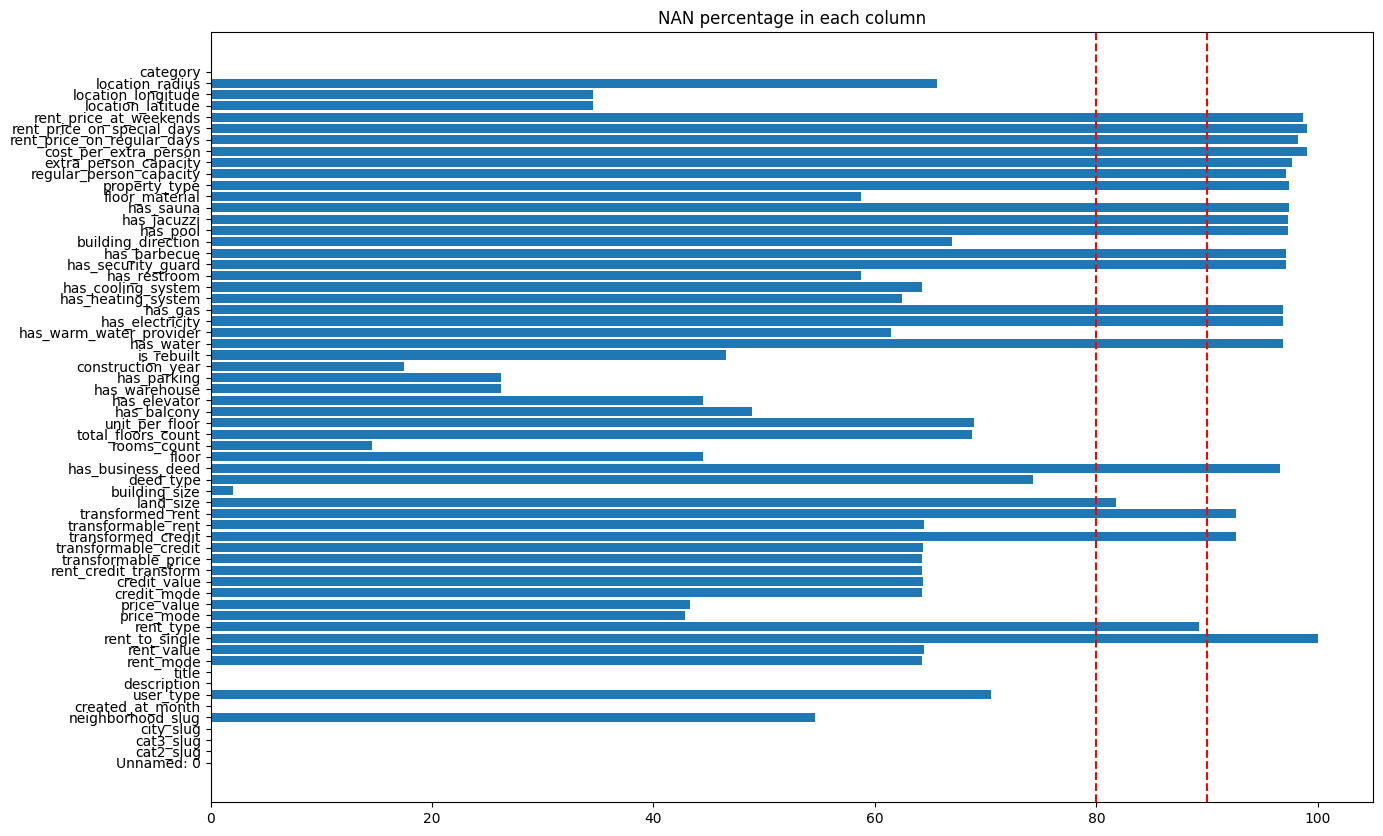

In [190]:
perc = df.isna().sum()*100/len(df)

gs = GridSpec(1, 1)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(gs[0, 0])
ax.barh(df.columns, perc.values)
plt.axvline(x = 80, color = 'r', ls='--')
plt.axvline(x = 90, color = 'r', ls='--')
plt.title('NAN percentage in each column')
plt.show()

<Axes: >

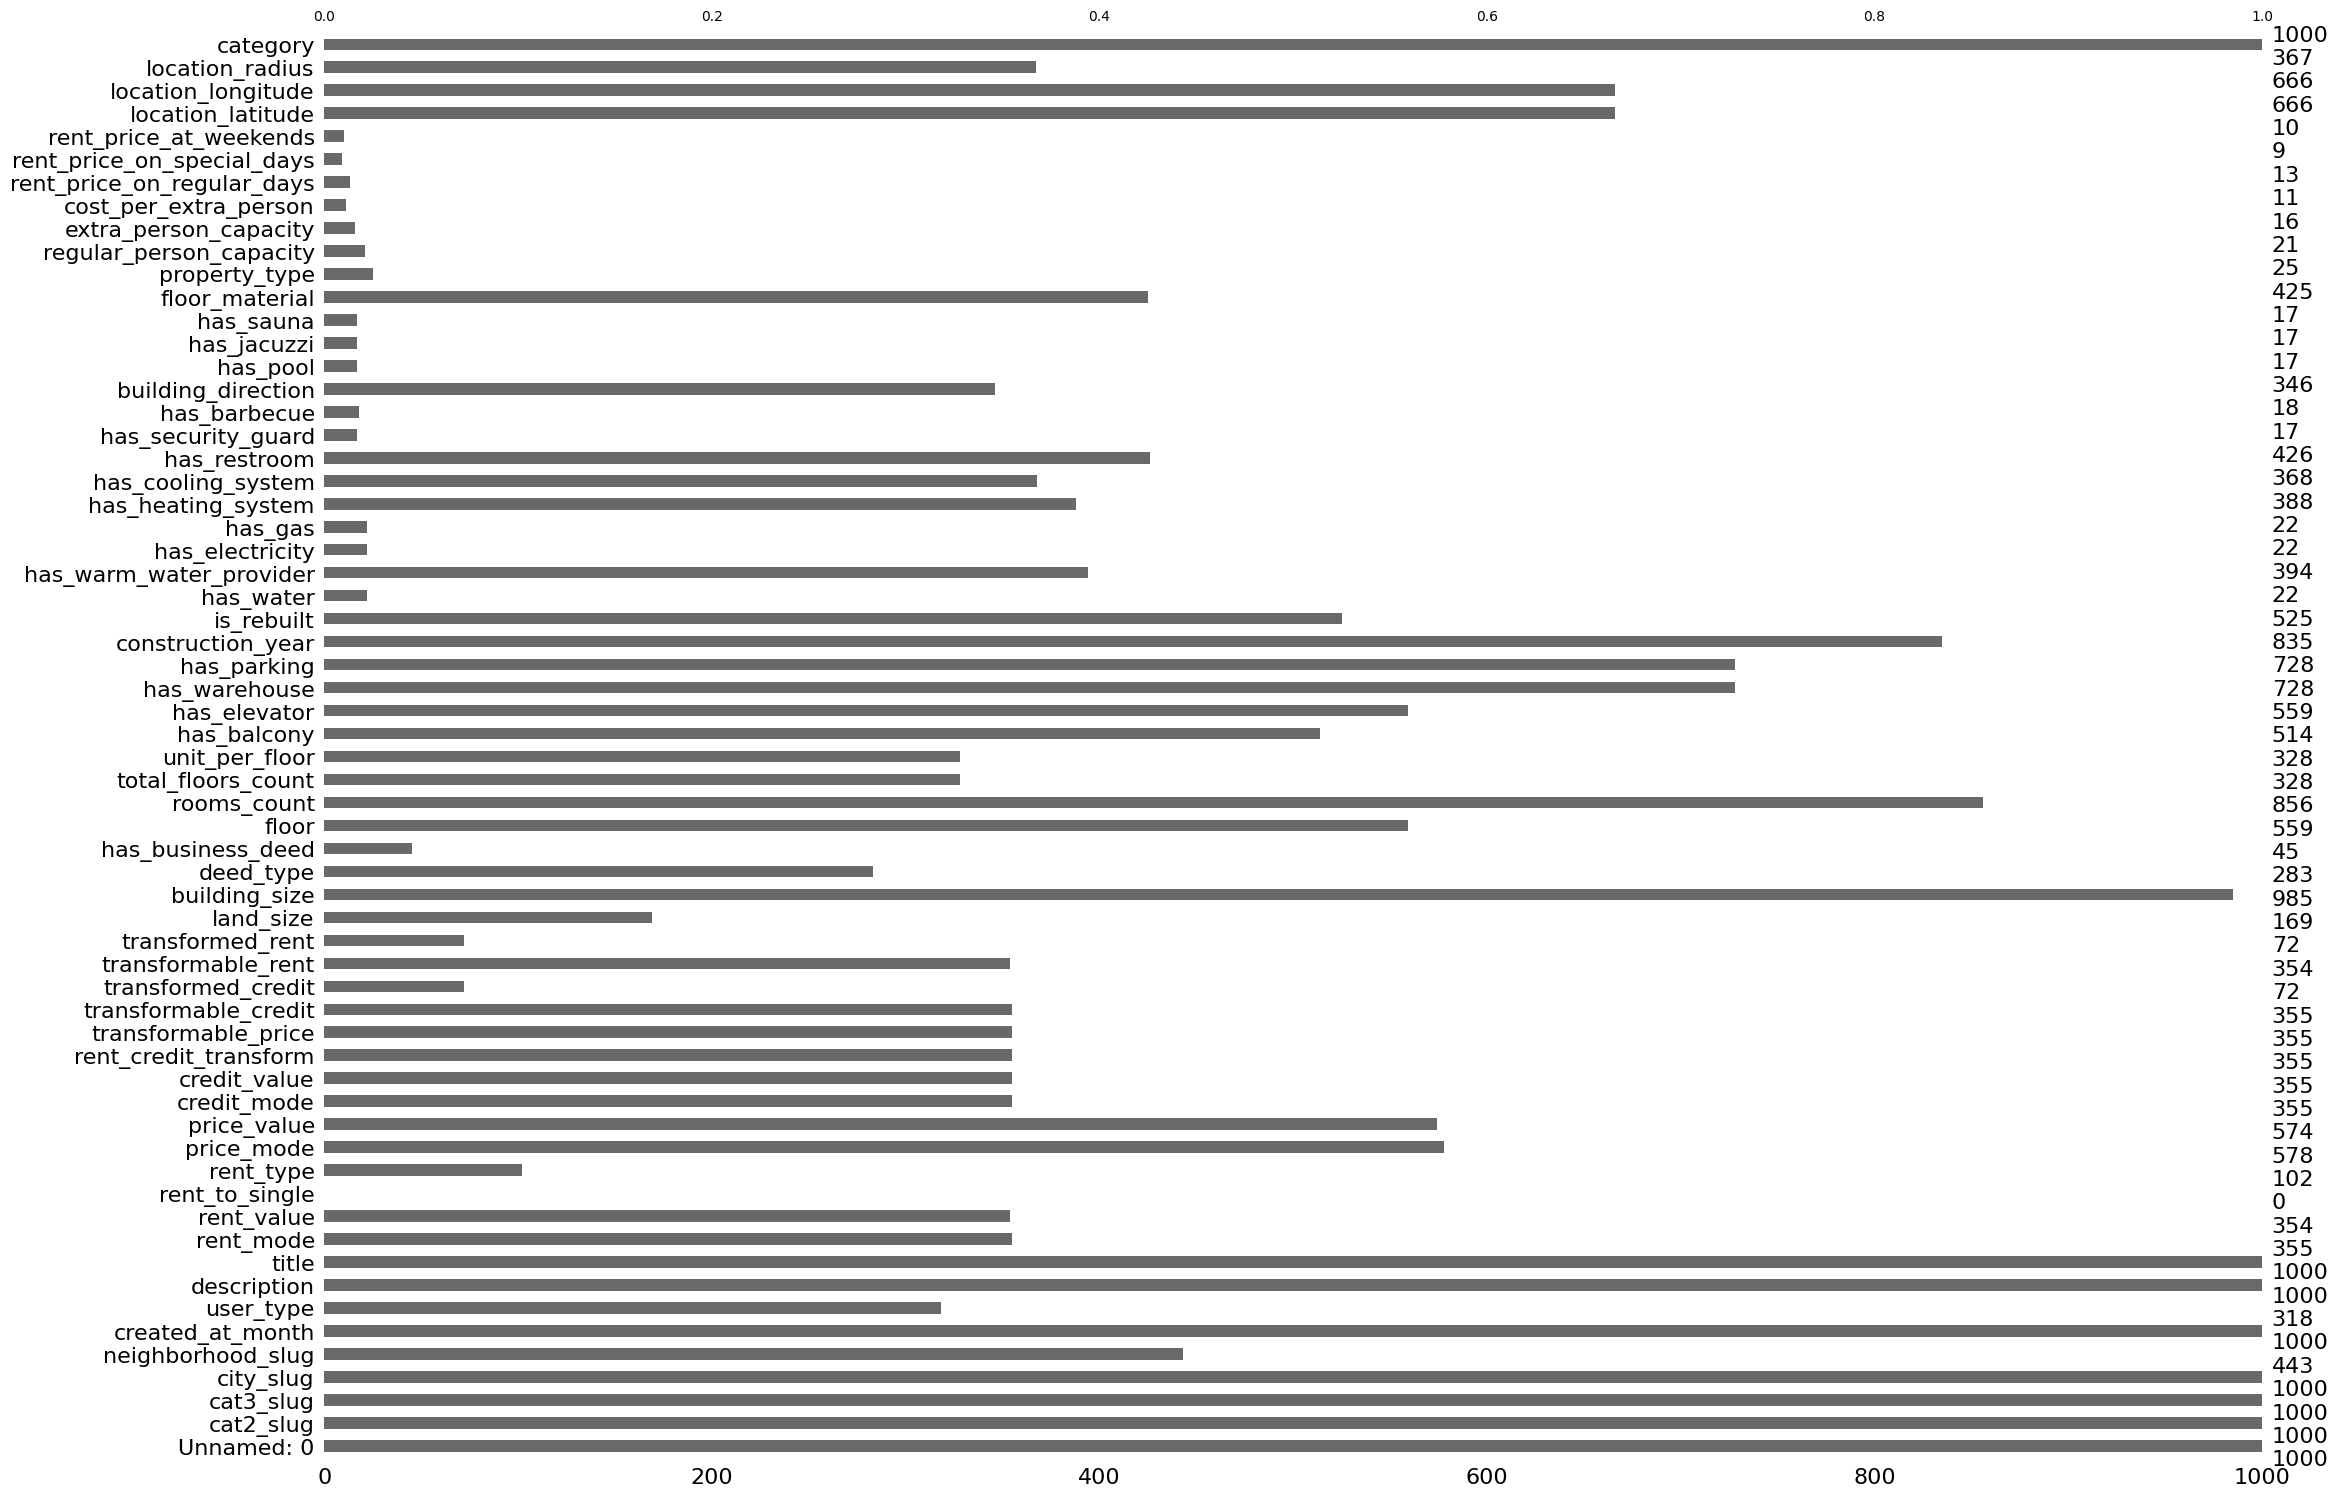

In [191]:
msno.bar(df.sample(1000))

<Axes: >

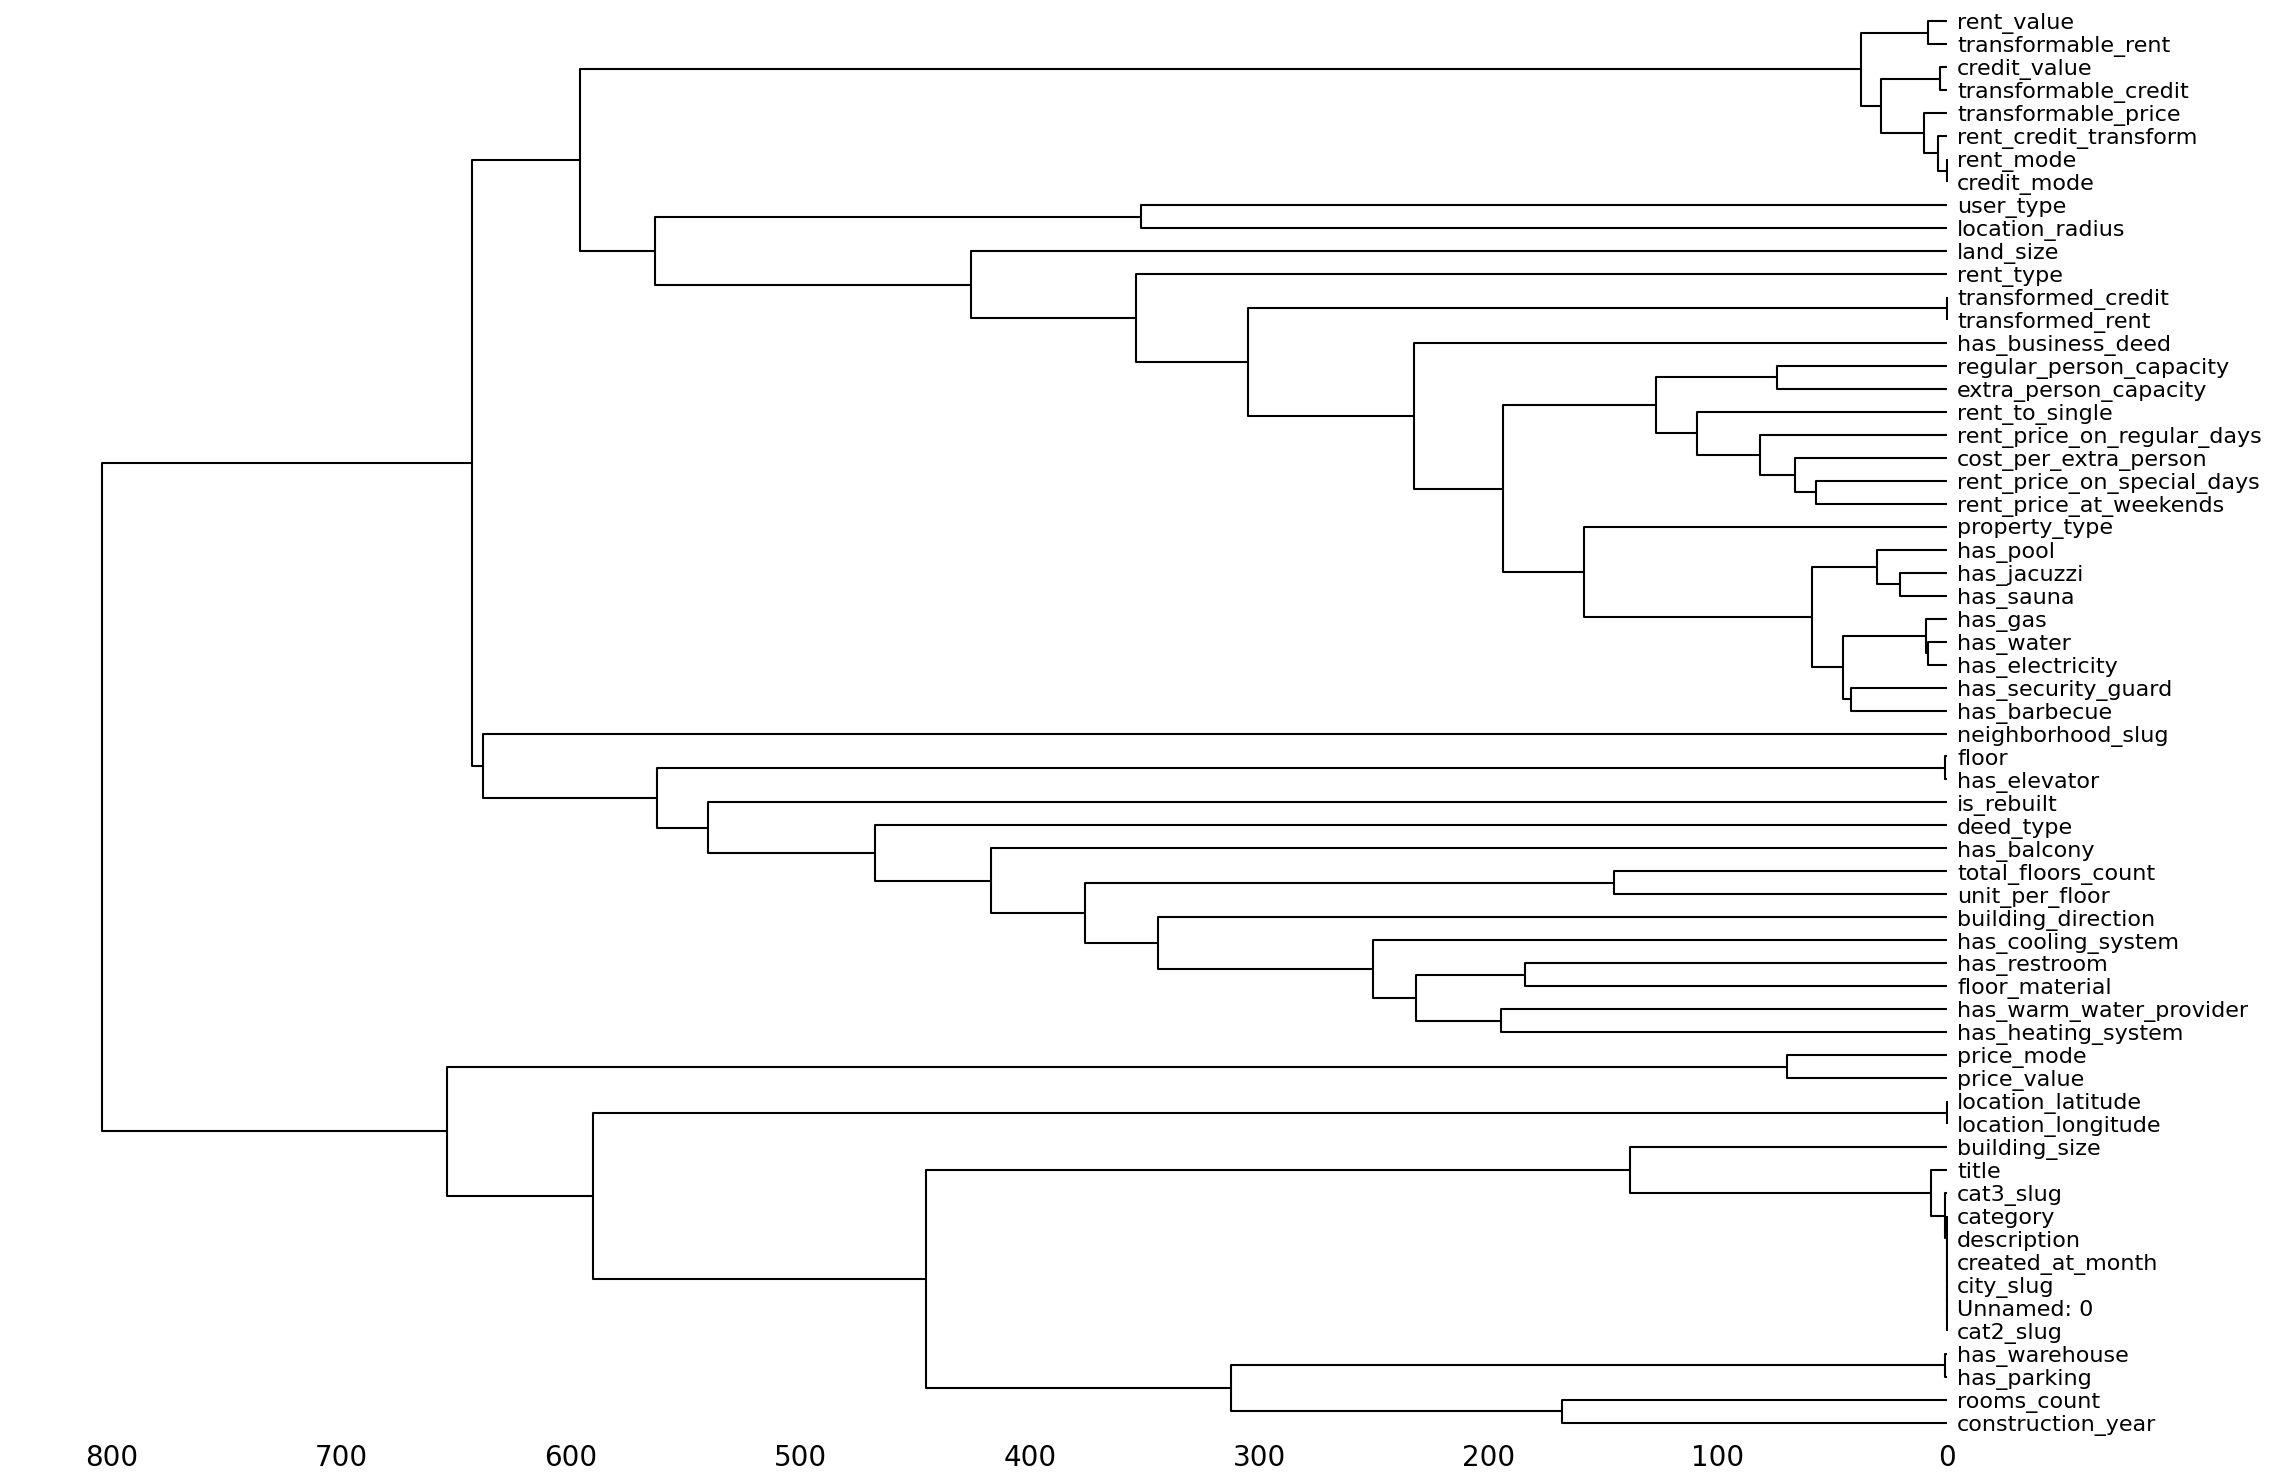

In [192]:
msno.dendrogram(df)

Some of features are unnecessary(have a lot of nan or has no info for predict price). So we can drop them!

In [193]:
df.columns

Index(['Unnamed: 0', 'cat2_slug', 'cat3_slug', 'city_slug',
       'neighborhood_slug', 'created_at_month', 'user_type', 'description',
       'title', 'rent_mode', 'rent_value', 'rent_to_single', 'rent_type',
       'price_mode', 'price_value', 'credit_mode', 'credit_value',
       'rent_credit_transform', 'transformable_price', 'transformable_credit',
       'transformed_credit', 'transformable_rent', 'transformed_rent',
       'land_size', 'building_size', 'deed_type', 'has_business_deed', 'floor',
       'rooms_count', 'total_floors_count', 'unit_per_floor', 'has_balcony',
       'has_elevator', 'has_warehouse', 'has_parking', 'construction_year',
       'is_rebuilt', 'has_water', 'has_warm_water_provider', 'has_electricity',
       'has_gas', 'has_heating_system', 'has_cooling_system', 'has_restroom',
       'has_security_guard', 'has_barbecue', 'building_direction', 'has_pool',
       'has_jacuzzi', 'has_sauna', 'floor_material', 'property_type',
       'regular_person_capacity',

In [194]:
df[['title', 'rent_mode', 'rent_value', 'rent_to_single', 'rent_type',
       'price_mode', 'price_value', 'credit_mode', 'credit_value',
       'rent_credit_transform', 'transformable_price', 'transformable_credit',
       'transformed_credit', 'transformable_rent', 'transformed_rent',]].head()

,title,rent_mode,rent_value,rent_to_single,rent_type,price_mode,price_value,credit_mode,credit_value,rent_credit_transform,transformable_price,transformable_credit,transformed_credit,transformable_rent,transformed_rent
0,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,۶۰ متر قلهک فول امکانات,NaN,NaN,NaN,NaN,مقطوع,8.500000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,NaN,NaN,NaN,NaN,مقطوع,750000000.0,False,False,750000000.0,NaN,26000000.0,NaN
3,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,NaN,NaN,NaN,NaN,مقطوع,950000000.0,False,False,950000000.0,NaN,95000000.0,NaN
4,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,NaN,NaN,NaN,مقطوع,5.750000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


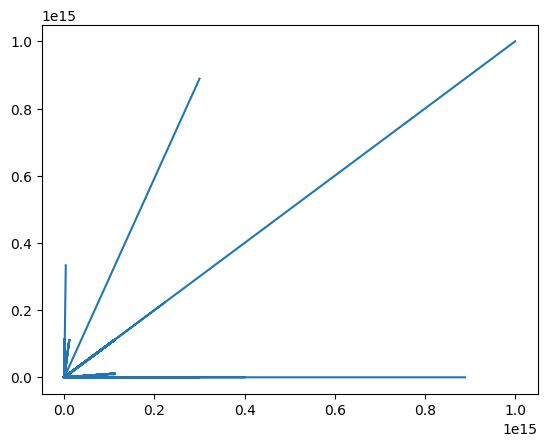

In [195]:
plt.plot(df['transformable_credit'], df['transformable_rent'])

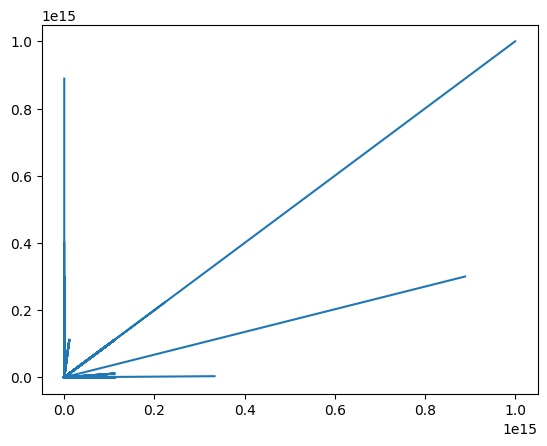

In [196]:
plt.plot(df['rent_value'], df['credit_value'])

In [197]:
df1 = df.drop(['Unnamed: 0', 'rent_to_single', 'rent_price_on_regular_days',
              'rent_price_on_special_days', 'rent_price_at_weekends', 'cost_per_extra_person',
              'extra_person_capacity', 'regular_person_capacity', 'title', 'description',
              'has_pool', 'has_jacuzzi', 'has_sauna', 'has_security_guard', 'has_barbecue',
              'has_water', 'has_electricity', 'has_gas', 'transformed_credit', 'transformable_rent','transformed_rent',
              'rent_credit_transform', 'has_business_deed', 'property_type', 'user_type'], axis=1)

In [198]:
df1.columns

Index(['cat2_slug', 'cat3_slug', 'city_slug', 'neighborhood_slug',
       'created_at_month', 'rent_mode', 'rent_value', 'rent_type',
       'price_mode', 'price_value', 'credit_mode', 'credit_value',
       'transformable_price', 'transformable_credit', 'land_size',
       'building_size', 'deed_type', 'floor', 'rooms_count',
       'total_floors_count', 'unit_per_floor', 'has_balcony', 'has_elevator',
       'has_warehouse', 'has_parking', 'construction_year', 'is_rebuilt',
       'has_warm_water_provider', 'has_heating_system', 'has_cooling_system',
       'has_restroom', 'building_direction', 'floor_material',
       'location_latitude', 'location_longitude', 'location_radius',
       'category'],
      dtype='object')

In [199]:
df1['rent_type'].value_counts()

rent_type
rent_credit    103048
full_credit       144
Name: count, dtype: int64

In [200]:
df1['rent_mode'].value_counts()

rent_mode
مقطوع     284690
مجانی      58177
توافقی      1625
Name: count, dtype: int64

In [201]:
df1[df1['credit_mode']=='مقطوع'][['transformable_credit', 'price_value']]

,transformable_credit,price_value
2,7.500000e+08,NaN
3,9.500000e+08,NaN
5,2.500000e+08,NaN
6,1.500000e+08,NaN
11,1.200000e+09,NaN
...,...,...
963262,2.200000e+08,NaN
963264,3.000000e+07,NaN
963270,1.500000e+08,NaN
963273,1.000000e+09,NaN


In [202]:
df1[df1['rent_mode']=='مجانی']['transformable_credit']

11        1.200000e+09
38        2.500000e+08
48        1.500000e+09
65        2.500000e+09
92        1.200000e+09
              ...     
963228    5.000000e+08
963236    3.600000e+08
963240    3.100000e+08
963246    4.600000e+08
963276    3.500000e+08
Name: transformable_credit, Length: 58177, dtype: float64

In [203]:
df1['has_balcony'].value_counts()

has_balcony
true        382337
false        84877
True         20194
False         4321
unselect       207
Name: count, dtype: int64

In [204]:
df1[['rent_mode', 'rent_type', 'price_mode', 'rent_value', 'credit_value',
       'price_value', 'credit_mode', 'transformable_price', 'transformable_credit']]

,rent_mode,rent_type,price_mode,rent_value,credit_value,price_value,credit_mode,transformable_price,transformable_credit
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,مقطوع,NaN,NaN,8.500000e+09,NaN,NaN,NaN
2,مقطوع,NaN,NaN,26000000.0,7.500000e+08,NaN,مقطوع,False,7.500000e+08
3,مقطوع,NaN,NaN,95000000.0,9.500000e+08,NaN,مقطوع,False,9.500000e+08
4,NaN,NaN,مقطوع,NaN,NaN,5.750000e+09,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
963272,NaN,NaN,مقطوع,NaN,NaN,7.470000e+09,NaN,NaN,NaN
963273,مقطوع,rent_credit,NaN,45000000.0,1.000000e+09,NaN,مقطوع,True,1.000000e+09
963274,NaN,NaN,مقطوع,NaN,NaN,3.200000e+09,NaN,NaN,NaN
963275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## create full_price column as target 

In [205]:
df1['full_price'] = df1['price_value']

In [206]:
df1['full_price'] = df1['full_price'].fillna(df1['credit_value'] + (df1['rent_value']/3)*100)

In [207]:
df1['full_price'].isna().sum()

np.int64(74563)

In [208]:
df2 = df1.dropna(subset=['full_price']).reset_index().drop(['index', 'rent_mode', 'rent_type', 'price_mode', 'rent_value', 'credit_value',
       'price_value', 'credit_mode', 'transformable_price', 'transformable_credit'], axis=1)

In [209]:
df2.full_price = df2.full_price/1000000

In [210]:
(df2.sort_values(by='full_price')['full_price']<100).sum()

np.int64(29651)

{'whiskers': [<matplotlib.lines.Line2D at 0x2b9695dbb50>,
 'caps': [<matplotlib.lines.Line2D at 0x2b9695e0dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b92e177050>],
 'medians': [<matplotlib.lines.Line2D at 0x2b9695e2090>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b9695e1ed0>],
 'means': []}

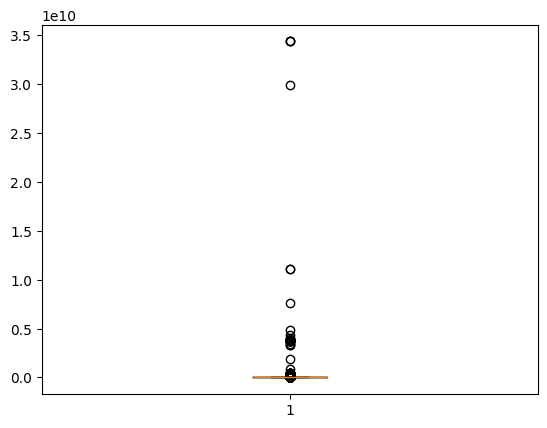

In [211]:
plt.boxplot(df2.full_price)

In [212]:
df2 = df2.drop(df2[(df2.full_price<50)|(df2.full_price>5e9)].index)

In [213]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866221 entries, 0 to 888713
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat2_slug                866221 non-null  object 
 1   cat3_slug                866221 non-null  object 
 2   city_slug                866221 non-null  object 
 3   neighborhood_slug        403370 non-null  object 
 4   created_at_month         866221 non-null  object 
 5   land_size                168029 non-null  float64
 6   building_size            864997 non-null  float64
 7   deed_type                241720 non-null  object 
 8   floor                    523764 non-null  object 
 9   rooms_count              765692 non-null  object 
 10  total_floors_count       297117 non-null  object 
 11  unit_per_floor           295007 non-null  object 
 12  has_balcony              479943 non-null  object 
 13  has_elevator             523764 non-null  object 
 14  has_wareh

{'whiskers': [<matplotlib.lines.Line2D at 0x2b92e1a2490>,
 'caps': [<matplotlib.lines.Line2D at 0x2b969643710>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b969641dd0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b9696589d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b9696592d0>],
 'means': []}

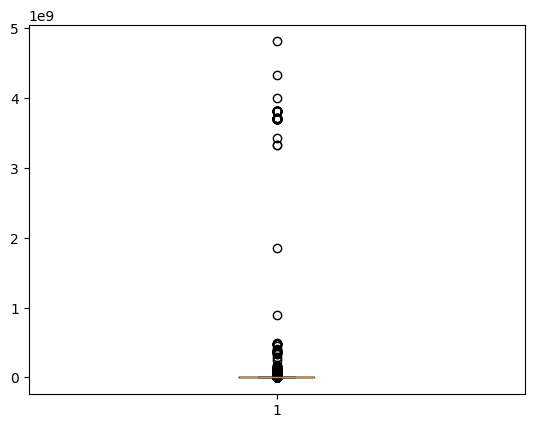

In [214]:
plt.boxplot(df2.full_price)

<Axes: >

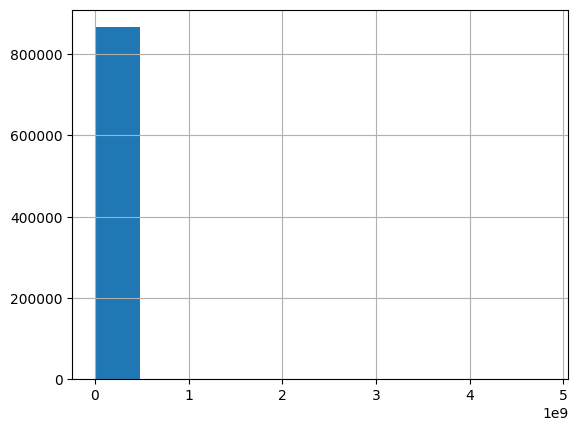

In [215]:
df2.full_price.hist()

In [216]:
def replace_outliers(df, c_name):
    c = df[c_name]
    df[c_name] = df[c_name].astype(float)
    q1 = c.quantile(0.25)
    q3 = c.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    
    c = np.where(c>upper, upper, c)
    c = np.where(c<lower, lower, c)
    df.loc[:, c_name] = c
    return df

In [217]:
df2 = replace_outliers(df2, 'full_price')

{'whiskers': [<matplotlib.lines.Line2D at 0x2b8d65bef10>,
 'caps': [<matplotlib.lines.Line2D at 0x2b8d65c8350>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b8d65be7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2b8d65c9690>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b8d65c9f90>],
 'means': []}

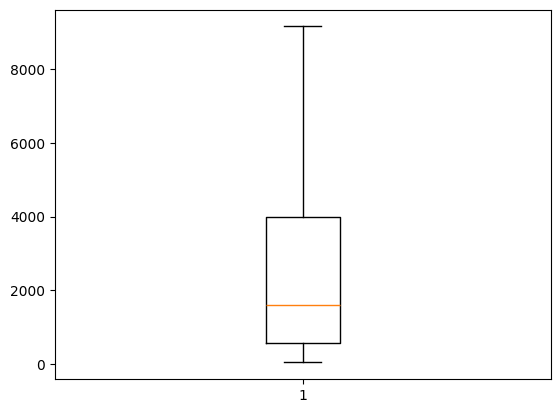

In [218]:
plt.boxplot(df2.full_price)

<Axes: >

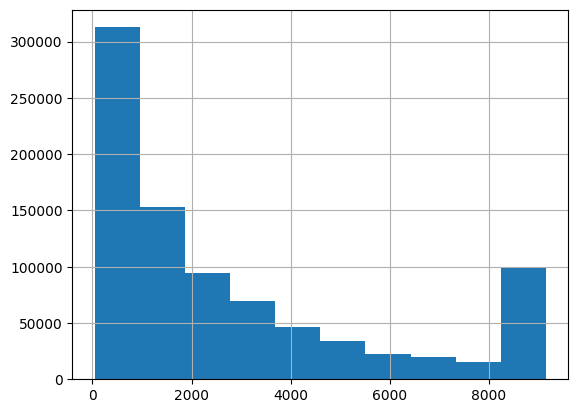

In [219]:
df2.full_price.hist()

In [220]:
df2.sort_values(by='full_price')

,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,land_size,building_size,deed_type,floor,rooms_count,...,has_heating_system,has_cooling_system,has_restroom,building_direction,floor_material,location_latitude,location_longitude,location_radius,category,full_price
300355,residential-sell,plot-old,lavasan-city,NaN,2024-12-01 00:00:00,NaN,1000.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.817070,51.672306,NaN,شهر کوچک,50.0
108829,commercial-rent,office-rent,qeshm,NaN,2024-05-01 00:00:00,NaN,50.0,NaN,1,دو,...,NaN,NaN,NaN,NaN,NaN,26.477949,55.710297,NaN,شهر کوچک,50.0
169103,commercial-rent,office-rent,rafsanjan,NaN,2024-08-01 00:00:00,NaN,90.0,NaN,2,دو,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,شهر کوچک,50.0
14997,commercial-rent,industry-agriculture-business-rent,babol,NaN,2024-10-01 00:00:00,NaN,1300.0,NaN,NaN,یک,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,شهر کوچک,50.0
275356,residential-rent,house-villa-rent,kermanshah,NaN,2024-06-01 00:00:00,50.0,50.0,NaN,NaN,یک,...,unselect,water_cooler,squat,unselect,unselect,34.318935,47.077953,NaN,کلان‌شهر,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418274,residential-sell,plot-old,charbagh-alborz,NaN,2024-11-01 00:00:00,NaN,2100.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.858673,50.760719,NaN,شهر کوچک,9150.0
888691,residential-sell,apartment-sell,tehran,gisha,2024-05-01 00:00:00,NaN,164.0,single_page,3.0,سه,...,shoofaj,water_cooler,squat_seat,north,stone,35.728760,51.378708,500.0,کلان‌شهر,9150.0
418287,residential-sell,apartment-sell,ahvaz,kianpars,2024-08-01 00:00:00,NaN,180.0,single_page,2,سه,...,NaN,split,NaN,NaN,ceramic,NaN,NaN,NaN,کلان‌شهر,9150.0
55,residential-sell,apartment-sell,tehran,ekhtiyariyeh,2024-12-01 00:00:00,NaN,150.0,single_page,1,سه,...,NaN,NaN,squat_seat,north,stone,35.785004,51.454659,NaN,کلان‌شهر,9150.0


In [221]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866221 entries, 0 to 888713
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat2_slug                866221 non-null  object 
 1   cat3_slug                866221 non-null  object 
 2   city_slug                866221 non-null  object 
 3   neighborhood_slug        403370 non-null  object 
 4   created_at_month         866221 non-null  object 
 5   land_size                168029 non-null  float64
 6   building_size            864997 non-null  float64
 7   deed_type                241720 non-null  object 
 8   floor                    523764 non-null  object 
 9   rooms_count              765692 non-null  object 
 10  total_floors_count       297117 non-null  object 
 11  unit_per_floor           295007 non-null  object 
 12  has_balcony              479943 non-null  object 
 13  has_elevator             523764 non-null  object 
 14  has_wareh

In [222]:
df2['created_at_month'] = pd.to_datetime(df2['created_at_month'])

In [223]:
df2['created_at_month'].apply(lambda x: x.year).value_counts()

created_at_month
2024    863821
2025      1223
2023      1144
2022        31
2021         2
Name: count, dtype: int64

In [224]:
df2['year'] = df2['created_at_month'].apply(lambda x: x.year)
df2 = df2[df2.year==2024]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863821 entries, 0 to 888713
Data columns (total 30 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   cat2_slug                863821 non-null  object        
 1   cat3_slug                863821 non-null  object        
 2   city_slug                863821 non-null  object        
 3   neighborhood_slug        402491 non-null  object        
 4   created_at_month         863821 non-null  datetime64[ns]
 5   land_size                167437 non-null  float64       
 6   building_size            862598 non-null  float64       
 7   deed_type                240622 non-null  object        
 8   floor                    522373 non-null  object        
 9   rooms_count              763615 non-null  object        
 10  total_floors_count       296306 non-null  object        
 11  unit_per_floor           294201 non-null  object        
 12  has_balcony          

In [225]:
df2 = df2.drop(['created_at_month', 'year'], axis=1)

## split data into train, validation, and test

In [226]:
X = df2.drop(['full_price'], axis=1)
y = df2['full_price']

In [227]:
X_train, X_test1, y_train, y_test1 = train_test_split(
    X, y, test_size=0.4, random_state=42)

In [228]:
X_valid, X_test, y_valid, y_test = train_test_split(
    X_test1, y_test1, test_size=0.4, random_state=42)

In [229]:
train_data = pd.concat([X_train, pd.DataFrame(y_train)], axis=1).reset_index().drop(columns=['index'])

In [260]:
X_valid = X_valid.reset_index().drop(columns=['index'])
X_test = X_test.reset_index().drop(columns=['index'])

## Handling missing values

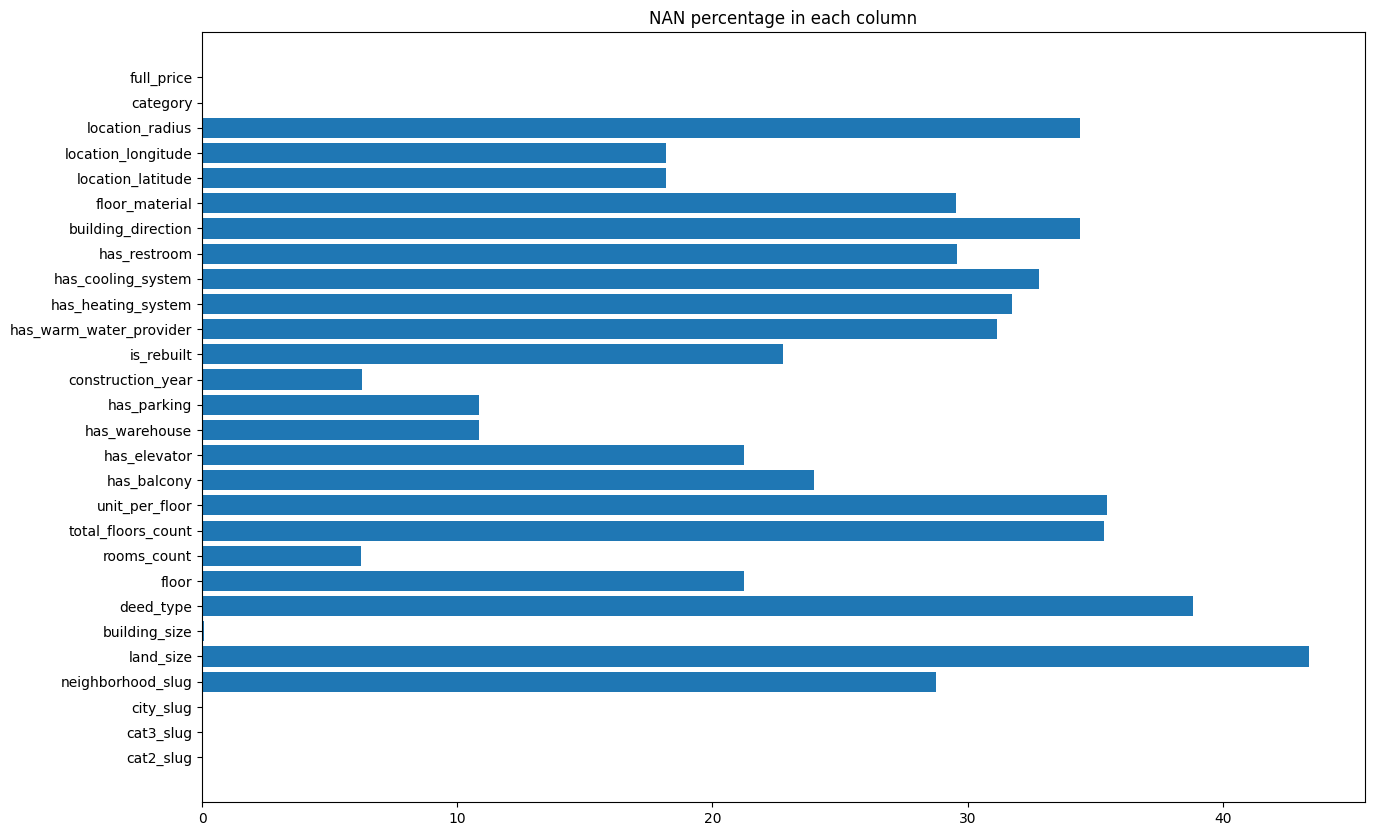

In [230]:
perc = train_data.isna().sum()*100/len(df)

gs = GridSpec(1, 1)
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(gs[0, 0])
ax.barh(train_data.columns, perc.values)
# plt.axvline(x = 80, color = 'r', ls='--')
# plt.axvline(x = 90, color = 'r', ls='--')
plt.title('NAN percentage in each column')
plt.show()

### neighborhood_slug

In [231]:
train_data.city_slug.value_counts()

city_slug
tehran        107122
mashhad        37802
karaj          27926
isfahan        19805
shiraz         19477
               ...  
saman-city        45
kiasar            40
shal              33
lavandevil        25
hormuz            19
Name: count, Length: 240, dtype: int64

In [232]:
train_data.groupby(['city_slug'])['neighborhood_slug'].apply(pd.Series.mode)

city_slug       
ahvaz          0                    kianpars
bandar-anzali  0                chaharfarize
               1    pasdaran-bandar-e-anzali
isfahan        0          baharestan-esfahan
karaj          0                  gohardasht
lahijan        0            golestan-lahijan
mashhad        0                elahiyehblvd
qom            0               pardisan-ghom
rasht          0                     golsaar
shiraz         0                farhangshahr
talesh         0                    hashtpar
tehran         0                      poonak
Name: neighborhood_slug, dtype: object

In [233]:
train_data['neighborhood_slug'].value_counts()

neighborhood_slug
elahiyehblvd     4075
poonak           3103
ghasemabad       2889
saadat-abad      2604
bolvartoos       2524
                 ... 
bazkiya-gurab       1
shahrak-zafar       1
saberhanan          1
kuy-bayani          1
moallem             1
Name: count, Length: 1164, dtype: int64

As you see, most of the cities don't have neighborhood_slug. So we drop it!

In [234]:
train_data = train_data.drop(['neighborhood_slug'], axis=1)
X_valid = X_valid.drop(['neighborhood_slug'], axis=1)
X_test = X_test.drop(['neighborhood_slug'], axis=1)

### building_size

In [237]:
sum(train_data['building_size'].isna())

740

In [238]:
train_data[train_data['building_size'].isna()]['city_slug'].unique()

array(['mahmudabad', 'isfahan', 'hamedan', 'rasht', 'saveh',
       'khorramabad', 'karaj', 'tehran', 'ahvaz', 'mashhad', 'gorgan',
       'shiraz', 'kermanshah', 'qom', 'babol', 'shahriar-city',
       'sabzevar', 'firuzkooh', 'chamestan', 'neyshabur', 'kashan',
       'bandar-abbas', 'birjand', 'sari', 'golbahar-city',
       'bandar-anzali', 'arak', 'zahedan', 'ardabil', 'shahin-shahr',
       'garmdareh', 'bojnurd', 'qods-city', 'pardis-city', 'lahijan',
       'nasimshahr', 'sadra', 'qarchak-city', 'tabriz', 'eslamabad-gharb',
       'chahar-dangeh', 'shushtar', 'nowshahr', 'fardis-city', 'yazd',
       'urmia', 'malayer', 'talesh', 'andisheh-new-town', 'nazarabad',
       'eslamshahr', 'abhar', 'chalus', 'gonbad-kavus', 'qazvin',
       'dezful', 'dorud', 'varamin-city', 'yasuj', 'kerman', 'sanandaj',
       'pakdasht-city', 'bushehr', 'khoram-abad', 'salman-shahr',
       'parand-city', 'sorkhrood', 'qaem-shahr', 'jiroft', 'nahavand',
       'kahrizak', 'mohammadieh', 'Iranshahr

In [261]:
group_temp = train_data.groupby(['city_slug'])['building_size'].median().reset_index().rename(columns={'building_size': 'med'})

train_temp = train_data[['city_slug']].merge(group_temp, on=['city_slug'], how='left')
train_data['building_size'] = train_data['building_size'].fillna(train_temp['med'])

In [266]:
sum(X_valid['building_size'].isna()), sum(X_test['building_size'].isna())

(0, 0)

In [264]:
valid_temp = X_valid[['city_slug']].merge(group_temp, on=['city_slug'], how='left')
X_valid['building_size'] = X_valid['building_size'].fillna(valid_temp['med'])

In [265]:
test_temp = X_test[['city_slug']].merge(group_temp, on=['city_slug'], how='left')
X_test['building_size'] = X_test['building_size'].fillna(test_temp['med'])

In [268]:
sum(X_valid['building_size'].isna()), sum(X_test['building_size'].isna())

(0, 0)

### land size

In [273]:
group_temp = train_data.groupby(['building_size'])['land_size'].median().ffill().reset_index().rename(columns={'land_size': 'med'})

train_temp = train_data[['building_size']].merge(group_temp, on=['building_size'], how='left')
train_data['land_size'] = train_data['land_size'].fillna(train_temp['med'])

In [ ]:
valid_temp = X_valid[['building_size']].merge(group_temp, on=['building_size'], how='left')
X_valid['land_size'] = X_valid['land_size'].fillna(valid_temp['med'])

In [ ]:
test_temp = X_test[['building_size']].merge(group_temp, on=['building_size'], how='left')
X_test['land_size'] = X_test['land_size'].fillna(test_temp['med'])

In [178]:
train_data.groupby(['city_slug', 'neighborhood_slug'])['full_price'].mean()

city_slug  neighborhood_slug
ahvaz      amaniyeh-ahvaz       3532.497175
           ariyashahr           3114.694444
           baharestan-ahvaz     2197.957046
           bahonar              2225.891012
           camplojonoobi        2235.037362
                                   ...     
tehran     zamzam               2303.499338
           zargandeh            4698.882576
           zarkesh              3391.085546
           zehtabi              1968.282353
           zeynabeiyeh          2900.000000
Name: full_price, Length: 1163, dtype: float64